In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns

In [2]:
ppi = pdr.get_data_fred('PPIACO', '2018-01-01')
ppi

,PPIACO
DATE,
2018-01-01,197.900
2018-02-01,199.300
2018-03-01,199.300
2018-04-01,200.300
2018-05-01,203.200
...,...
2024-01-01,251.306
2024-02-01,254.914
2024-03-01,255.116


In [3]:
ppi.describe()

,PPIACO
count,77.000000
mean,225.949662
std,28.749428
min,185.500000
25%,199.300000
50%,215.000000
75%,254.971000
max,280.251000


In [4]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2018-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPIACO  77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [5]:
ppi.isnull().sum()

PPIACO    0
dtype: int64

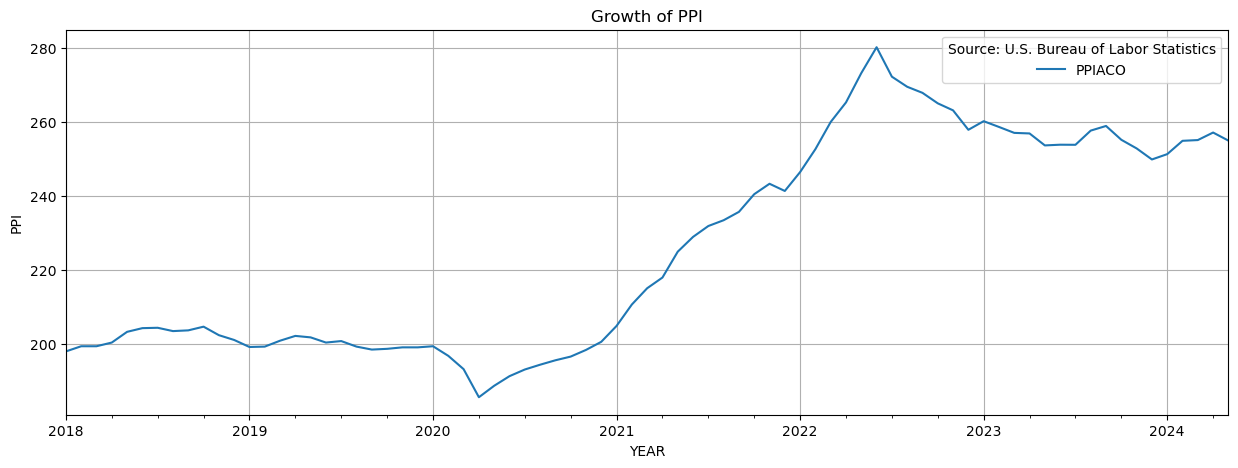

In [6]:
ppi.plot(xlabel='YEAR', ylabel='PPI', title='Growth of PPI', grid=True, figsize=(15, 5))
plt.legend(title='Source: U.S. Bureau of Labor Statistics')
plt.savefig('ppi_plot.png', format='png')
plt.show()

In [7]:
cpi = pd.read_csv('CPILFESL.csv')
cpi.head()

,DATE,CPILFESL
0,1957-01-01,28.5
1,1957-02-01,28.6
2,1957-03-01,28.7
3,1957-04-01,28.8
4,1957-05-01,28.8


In [8]:
cpi['DATE'] = pd.to_datetime(cpi['DATE'])

In [9]:
cpi.head()

,DATE,CPILFESL
0,1957-01-01,28.5
1,1957-02-01,28.6
2,1957-03-01,28.7
3,1957-04-01,28.8
4,1957-05-01,28.8


In [10]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      809 non-null    datetime64[ns]
 1   CPILFESL  809 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [11]:
cpi = cpi.set_index(['DATE'])

In [12]:
cpi['2018-01-01':]

,CPILFESL
DATE,
2018-01-01,255.204
2018-02-01,255.711
2018-03-01,256.271
2018-04-01,256.630
2018-05-01,257.145
...,...
2024-01-01,314.438
2024-02-01,315.565
2024-03-01,316.698


In [33]:
# correlation = cpi.pct_change().join(ppi.pct_change()).dropna()
correlation = cpi.join(ppi).dropna()
correlation

,CPILFESL,PPIACO
DATE,,
2018-01-01,255.204,197.900
2018-02-01,255.711,199.300
2018-03-01,256.271,199.300
2018-04-01,256.630,200.300
2018-05-01,257.145,203.200
...,...,...
2024-01-01,314.438,251.306
2024-02-01,315.565,254.914
2024-03-01,316.698,255.116


In [34]:
correlation['2018-01-01':'2019-01-01']

,CPILFESL,PPIACO
DATE,,
2018-01-01,255.204,197.9
2018-02-01,255.711,199.3
2018-03-01,256.271,199.3
2018-04-01,256.630,200.3
2018-05-01,257.145,203.2
2018-06-01,257.399,204.2
2018-07-01,257.699,204.3
2018-08-01,257.891,203.4
2018-09-01,258.368,203.6


In [35]:
correlation.corr()

,CPILFESL,PPIACO
CPILFESL,1.000000,0.890523
PPIACO,0.890523,1.000000


In [36]:
correlation['CPI_MA'] = correlation['CPILFESL'].rolling(window=4).mean()
correlation['PPI_MA'] = correlation['PPIACO'].rolling(window=4).mean()


In [37]:
forecast_p = 12
ppi_forecast = correlation['PPI_MA'].iloc[-1] * (1 + correlation['PPIACO'].mean()) ** forecast_p
ppi_forecast

4.771015552342725e+30

In [39]:
correlation['2018-01-01':'2019-01-01']

,CPILFESL,PPIACO,CPI_MA,PPI_MA
DATE,,,,
2018-01-01,255.204,197.9,NaN,NaN
2018-02-01,255.711,199.3,NaN,NaN
2018-03-01,256.271,199.3,NaN,NaN
2018-04-01,256.630,200.3,255.95400,199.200
2018-05-01,257.145,203.2,256.43925,200.525
2018-06-01,257.399,204.2,256.86125,201.750
2018-07-01,257.699,204.3,257.21825,203.000
2018-08-01,257.891,203.4,257.53350,203.775
2018-09-01,258.368,203.6,257.83925,203.875


In [41]:
import pandas as pd

# Sample data (you should replace this with your actual data)
data = {
    'Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),
    'CPI': [261.582, 263.014, 264.786, 266.832, 268.551, 270.214, 271.696, 273.567, 274.310, 276.589, 278.230, 279.195,
            280.126, 281.504, 282.921, 284.456, 285.778, 287.255, 288.667, 290.231, 291.387, 292.457, 293.580, 294.678],
    'PCE': [110.935, 111.375, 111.877, 112.431, 112.987, 113.519, 113.998, 114.612, 115.001, 115.685, 116.349, 116.751,
            117.135, 117.635, 118.168, 118.751, 119.237, 119.759, 120.241, 120.819, 121.257, 121.695, 122.169, 122.648],
    'PPI': [119.2, 119.7, 120.5, 121.3, 122.0, 122.5, 123.0, 123.7, 124.2, 124.8, 125.3, 125.7, 126.0, 126.5, 127.0, 
            127.6, 128.0, 128.4, 128.8, 129.2, 129.6, 130.0, 130.5, 131.0]
}

df = pd.DataFrame(data)

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Calculate the moving average (let's use a 3-month window for this example)
df['CPI_MA'] = df['CPI'].rolling(window=3).mean()
df['PCE_MA'] = df['PCE'].rolling(window=3).mean()
df['PPI_MA'] = df['PPI'].rolling(window=3).mean()

# Forecast the next value using the last moving average
cpi_forecast = df['CPI_MA'].iloc[-1]
pce_forecast = df['PCE_MA'].iloc[-1]
ppi_forecast = df['PPI_MA'].iloc[-1]

print(f"Next CPI forecast: {cpi_forecast}")
print(f"Next PCE forecast: {pce_forecast}")
print(f"Next PPI forecast: {ppi_forecast}")
print(df)

Next CPI forecast: 293.57166666666666
Next PCE forecast: 122.17066666666665
Next PPI forecast: 130.5
                CPI      PCE    PPI      CPI_MA      PCE_MA      PPI_MA
Date                                                                   
2021-01-31  261.582  110.935  119.2         NaN         NaN         NaN
2021-02-28  263.014  111.375  119.7         NaN         NaN         NaN
2021-03-31  264.786  111.877  120.5  263.127333  111.395667  119.800000
2021-04-30  266.832  112.431  121.3  264.877333  111.894333  120.500000
2021-05-31  268.551  112.987  122.0  266.723000  112.431667  121.266667
2021-06-30  270.214  113.519  122.5  268.532333  112.979000  121.933333
2021-07-31  271.696  113.998  123.0  270.153667  113.501333  122.500000
2021-08-31  273.567  114.612  123.7  271.825667  114.043000  123.066667
2021-09-30  274.310  115.001  124.2  273.191000  114.537000  123.633333
2021-10-31  276.589  115.685  124.8  274.822000  115.099333  124.233333
2021-11-30  278.230  116.349  125.3